In [1]:
from PIL import Image, ImageOps
import webdataset as wds
import pytesseract
from itertools import islice
import editdistance
import utils
from IPython.display import display, Image, Markdown
import openai
import os
from io import BytesIO
import base64
from pprint import pprint as pp
import json

# Set your API key here
api_key = openai.api_key = os.environ['OPENAI_API_KEY']

In [2]:
import base64
import requests

def encode_image(pil_image):
    """Encode a PIL Image to Base64."""
    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

def gpt_recognize_text(image):
    base64_image = encode_image(image)

    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": "gpt-4-turbo",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": "Recognize the text in this image and return only the text as a string."
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    data = json.loads(response.text)
    try:
        result = data['choices'][0]['message']['content']
        return result
    except KeyError:
        return ""

# gpt_recognize_text(image)

---

2 1 47


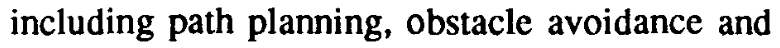

including path planning, obstacle avoidance and

including path planning, obstacle avoidance, and

---

4 1 69


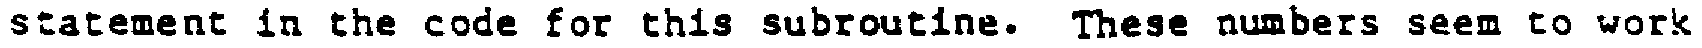

statement in the code for this subroutine. These numbers seem to work

statement in the code for this subroutine. These numbers seem to work.

---

11 17 46


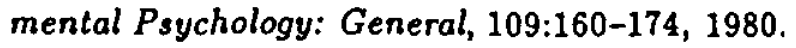

mental Psychology: General, 109:160-174, 1980.

Journal of Experimental Psychology: General, 109:160-174, 1980.

---

16 61 61


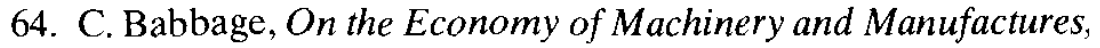

64. C. Babbage, On the Economy of Machinery and Manufactures,

---

19 47 64


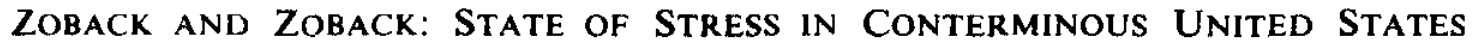

ZOBACK AND ZOBACK: STATE OF STRESS IN CONTERMINOUS UNITED STATES

Zoback and Zoback: State of Stress in Conterminous United States

---

24 2 66


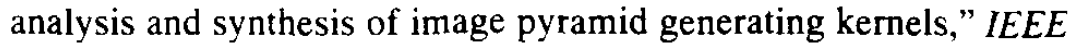

analysis and synthesis of image pyramid generating kernels,'' IEEE

analysis and synthesis of image pyramid generating kernels, IEEE

---

37 1 33


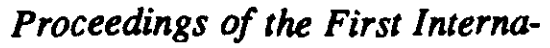

Proceedings of the First Interna-

Proceedings of the First Interna

---

40 3 77


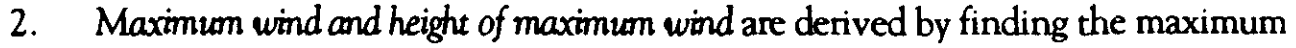

2. Maximum wind and height of maximum wind are derived by finding the maximum

Maximum wind and height of maximum wind are derived by finding the maximum

---

49 2 45


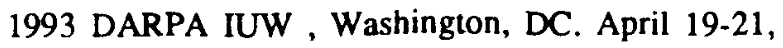

1993 DARPA IUW , Washington, DC. April 19-21,

1993 DARPA IUW, Washington, DC. April 19-21

---

53 5 5


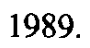

1989.

---

56 64 64


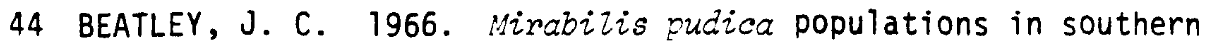

44 BEATLEY, J. C. 1966. Mirabilis pudica populations in southern

---

59 3 37


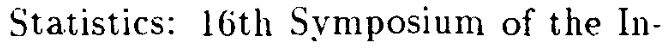

Statistics: 16th Symposium of the In-

Statistics: 16th Symposium of the In...

---

60 1 41


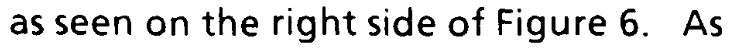

as seen on the right side of Figure 6. As

as seen on the right side of figure 6. As

---

70 3 50


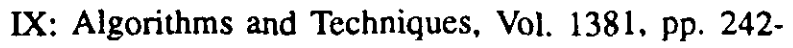

IX: Algorithms and Techniques, Vol. 1381, pp. 242-

IX: Algorithms and Techniques, Vol. 1381, pp. 242-247

---

75 1 40


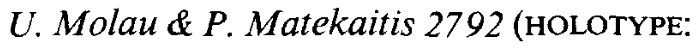

U. Molau & P. Matekaitis 2792 (HOLOTYPE:

U. Molau & P. Matekaitis 2792 (HOLOTYPE.

---

87 3 48


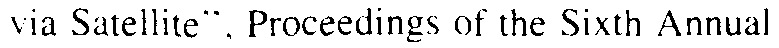

via Satellite'', Proceedings of the Sixth Annual

via Satellite - Proceedings of the Sixth Annual

---

109 1 36


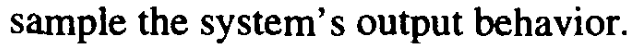

sample the system's output behavior.

Sample the system's output behavior.

---

116 1 60


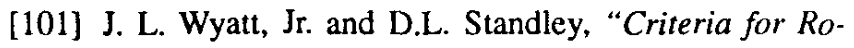

[101] J. L. Wyatt, Jr. and D.L. Standley, ''Criteria for Ro-

[10] J. L. Wyatt, Jr. and D.L. Standley, “Criteria for Ro-

---

141 12 128


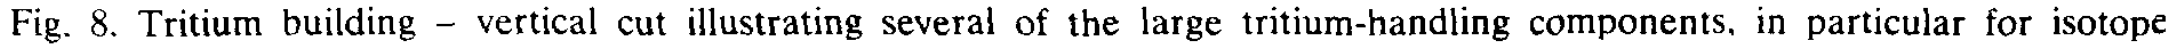

Fig. 8. Tritium building - vertical cut illustrating several of the large tritium-handling components, in particular for isotope

Fig. 8. Tritium building – vertical cut illustrating several of the large tritium-handling components, in particular for isotope separation.

---

166 3 3


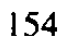

154

---

178 1 83


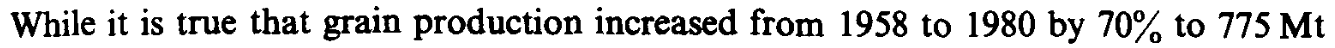

While it is true that grain production increased from 1958 to 1980 by 70% to 775 Mt

While it is true that grain production increased from 1958 to 1980 by 70% to 775 Mt.

---

181 4 71


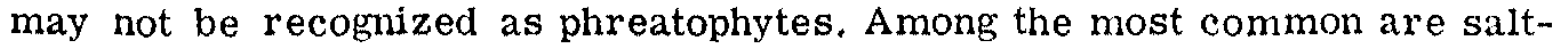

may not be recognized as phreatophytes. Among the most common are salt-

"may not be recognized as phreatophytes. Among the most common are salt-"

---

182 2 59


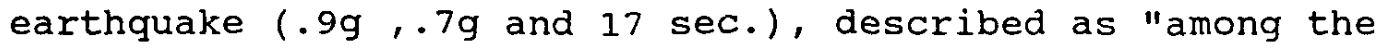

earthquake (.9g ,.7g and 17 sec.), described as ''among the

earthquake (.9g, .7g and 17 sec.), described as "among the

---

185 1 69


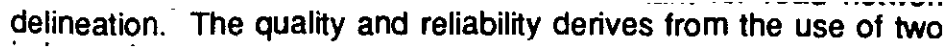

delineation. The quality and reliability derives from the use of two,

delineation. The quality and reliability derives from the use of two

---

199 1 40


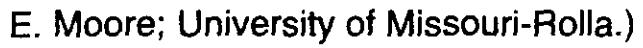

E. Moore; University of Missouri-Rolla.)

E. Moore; University of Missouri-Rolla.

All errors:
Normalized: 241/9277 (0.0260)
Text only: 167/8975 (0.0186)
Non-empty errors:
Normalized: 108/9144 (0.0118)
Text only: 41/8849 (0.0046)


In [3]:
dataset = wds.WebDataset("./uw3-test.tar").decode("pil")
ocrerrs = utils.OCRErrors()
ocrerrs_ne = utils.OCRErrors()
for i, sample in enumerate(islice(dataset, 200)):
    image = sample["png"]
    image = ImageOps.invert(image)
    gt = sample["txt"]
    pred = gpt_recognize_text(image)
    errs = ocrerrs.add(pred, gt)[0]
    if len (utils.text_only(pred)) > 0:
        ocrerrs_ne.add(pred, gt)[0]
    if errs > 0:
        display(Markdown("---"))
        print(i, errs, len(gt))
        display(image)
        display(Markdown(gt))
        display(Markdown(pred))

print("All errors:")
print(ocrerrs)
print("Non-empty errors:")
print(ocrerrs_ne)

---

0 3 68


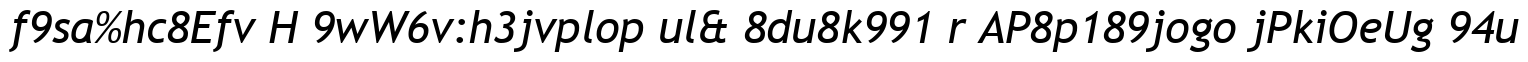

f9sa%hc8Efv H 9wW6v:h3jvplop ul& 8du8k991 r AP8p189jogo jPkiOeUg 94u

f9sa%hc8Efv H 9wW6v:h3jvplop ul& 8du8k991 r A8p189jogo jPKi0eUg 94u

---

1 1 31


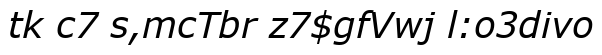

tk c7 s,mcTbr z7$gfVwj l:o3divo

tk c7 s,mcTbr z7$gfVwj l:03divo

---

2 8 56


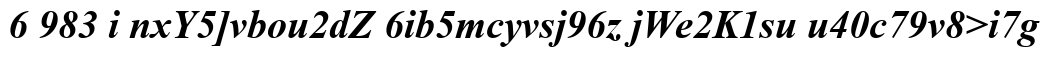

6 983 i nxY5]vbou2dZ 6ib5mcyvsj96z jWe2K1su u40c79v8>i7g

6983inxY5|vbou2dZ6ib5mcysj96z,jWe2KIsu u40c79v8>i7g

---

3 4 61


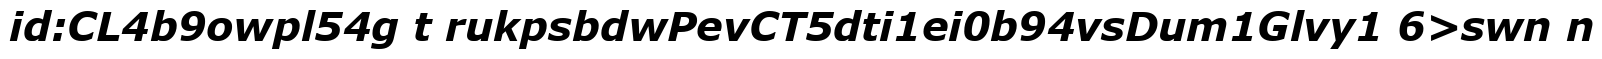

id:CL4b9owpl54g t rukpsbdwPevCT5dti1ei0b94vsDum1Glvy1 6>swn n

id:CL4b90wpl54g t rukpsbdwPevCT5dtileiob94vsDum1Glvy1 6>sw n n

---

4 4 74


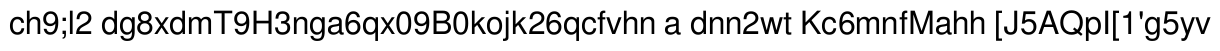

ch9;l2 dg8xdmT9H3nga6qx09B0kojk26qcfvhn a dnn2wt Kc6mnfMahh [J5AQpI[1'g5yv

ch9;l2 dg8xdmT9H3nq6aqx09B0kojk26qcfvhn a dnn2wt Kc6mnfMahh [J5AQpI['1'g5yv

---

5 8 45


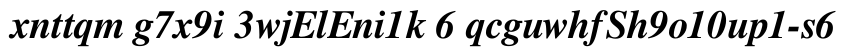

xnttqm g7x9i 3wjElEni1k 6 qcguwhfSh9o10up1-s6

xnttqm g7x9i 3wjELEnilk 6 qgqwhfSh9OIOupI-s6

---

6 6 51


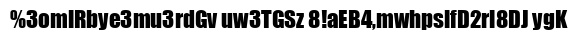

%3omlRbye3mu3rdGv uw3TGSz 8!aEB4,mwhpslfD2rl8DJ ygK

%3omlRbye3mu3rdGv_uw3TGSz&laEB4,mwhpslfD2rl8Dj_ygK

---

7 6 63


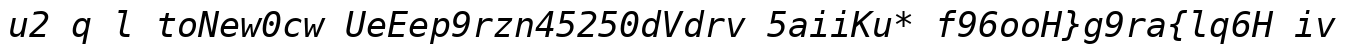

u2 q l toNew0cw UeEep9rzn45250dVdrv 5aiiKu* f96ooH}g9ra{lq6H iv

u2 q l toNew0cw UeEep9rzn45250dVdrv 5aiiKu* f960oHJ9graf[q6H iv

---

8 8 70


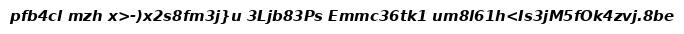

pfb4cl mzh x>-)x2s8fm3j}u 3Ljb83Ps Emmc36tk1 um8l61h<Is3jM5fOk4zvj.8be

pfba4cl mzh x>-)x2s8fm3jju 3Ljb83Ps Emmc36tk1 um8l6h1<ls3jM5f04kzvj.8be

---

9 5 70


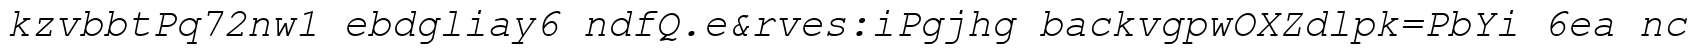

kzvbbtPq72nw1 ebdgliay6 ndfQ.e&rves:iPgjhg backvgpwOXZdlpk=PbYi 6ea nc

kzvbbtPq72nw1 ebdgliay6 ndfQ.&erves::iPgjhg backvgpw0Xzdlpk=PbYi 6ea nc

All errors:
Normalized: 880/9671 (0.0910)
Text only: 734/9535 (0.0770)
Non-empty errors:
Normalized: 752/9543 (0.0788)
Text only: 609/9410 (0.0647)


In [5]:
dataset = wds.WebDataset("./clean-test.tar").decode("pil")
ocrerrs = utils.OCRErrors()
ocrerrs_ne = utils.OCRErrors()
for i, sample in enumerate(islice(dataset, 200)):
    image = sample["png"]
    # image = ImageOps.invert(image)
    gt = sample["json"]["text"]
    pred = gpt_recognize_text(image)
    errs = ocrerrs.add(pred, gt)[0]
    if len(utils.text_only(pred)) > 0:
        ocrerrs_ne.add(pred, gt)
    if errs > 0 and i < 10:
        display(Markdown("---"))
        print(i, errs, len(gt))
        display(image)
        display(Markdown(gt))
        display(Markdown(pred))

print("All errors:")
print(ocrerrs)
print("Non-empty errors:")
print(ocrerrs_ne)